In [641]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

y = np.array( videogames['jp_sales'].tolist())

График для na_sales


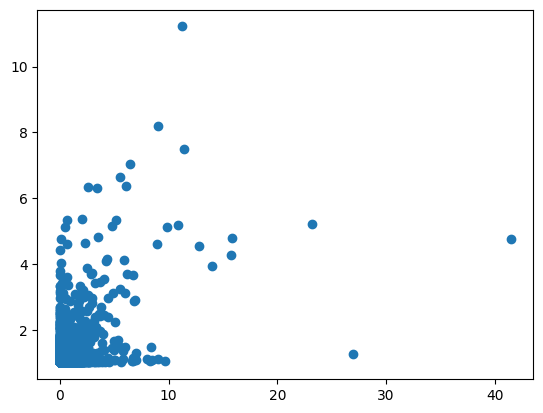

In [642]:
na_sales = np.array( videogames['na_sales'].tolist())
plt.figure()
plt.scatter(na_sales, y)
print('График для na_sales')
plt.show()

eu_sales [0.52 0.   0.   ... 0.   0.   0.  ]
График для eu_sales


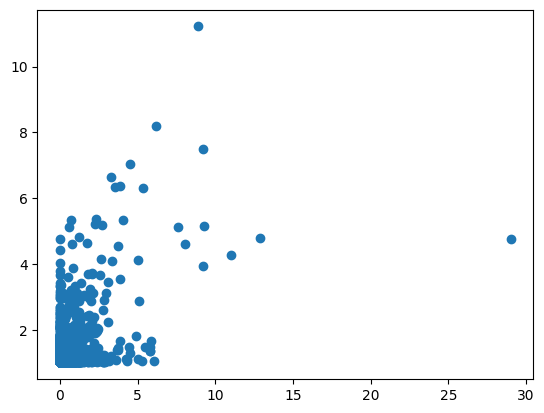

In [643]:
eu_sales = np.array(videogames['eu_sales'].tolist())
print("eu_sales", eu_sales)
plt.figure()
plt.scatter(eu_sales, y)
print('График для eu_sales')
plt.show()

Класс SimpleRegression

In [644]:
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

Модель линейной регрессии: y^ =  1.146761951218598  +  0.289427920575218 * x
[0.52 0.   0.   ... 0.   0.   0.  ]
[1.29726447 1.14676195 1.14676195 ... 1.14676195 1.14676195 1.14676195]


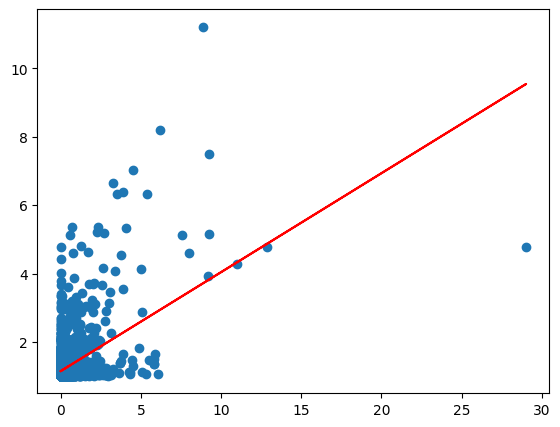

In [645]:
a1 = ((eu_sales - eu_sales.mean())*(y - y.mean())).mean()/((eu_sales - eu_sales.mean())**2).mean()
a0 = y.mean() - a1 * eu_sales.mean()
print("Модель линейной регрессии: y^ = ", a0, " + ", a1, "* x")


Y_pred = a0 + a1*eu_sales
print(eu_sales)
print(Y_pred)

fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(eu_sales, y)
ax.plot(eu_sales, Y_pred, 'r')


График для eu_sales

MSE после градиентного спуска:  0.18892371367388708
100


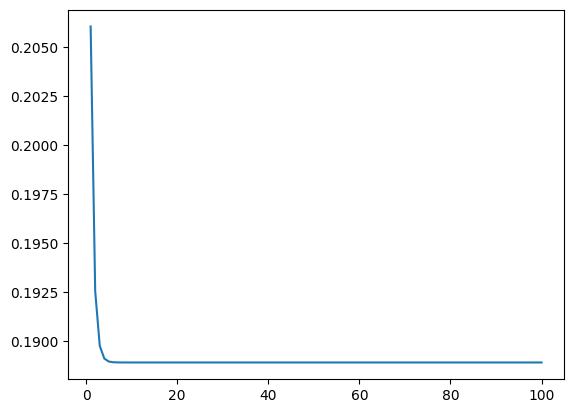

In [646]:


regr = SimpleRegression()

steps, errors = regr.fit(eu_sales, y, alpha = 0.0001, epsylon = 0.1, max_steps =100 )
print("MSE после градиентного спуска: ", regr.MSE(eu_sales, y))
Y_pred = regr.predict(eu_sales)
plt.figure()
plt.plot(steps, errors)
print(len(steps))

График для na_sales

MSE после градиентного спуска:  0.19130239902570276
100


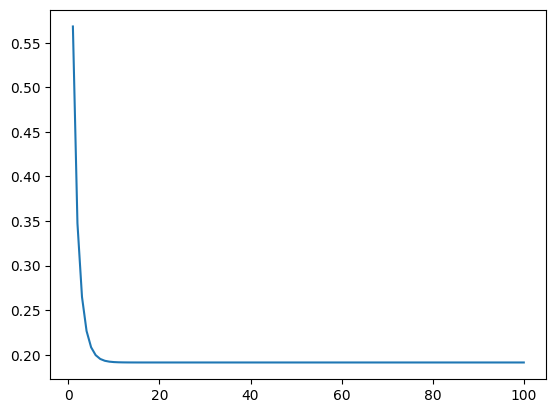

In [647]:

regr = SimpleRegression()

steps, errors = regr.fit(na_sales, y, alpha = 0.0001, epsylon = 0.1, max_steps =100)
print("MSE после градиентного спуска: ", regr.MSE(na_sales, y))
Y_pred = regr.predict(na_sales)
plt.figure()
plt.plot(steps, errors)
print(len(steps))